### Carga de datos

In [2]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
plt.style.use('default')
sns.set()

In [4]:
#Funciones auxiliares
def mostrar_porcentaje_barplot(ax):
    suma = 0
    for p in ax.patches:
        suma += p.get_height()
    for p in ax.patches:
        ax.annotate(str(np.round(100 *(p.get_height() / suma),decimals=2)) + "%", (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
def mostrar_valores_barplot(ax):
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [5]:
#Cargo el DataFrame
df = pd.read_csv('events.csv', low_memory = False, parse_dates = ['timestamp'], infer_datetime_format = True,
                    dtype = {'event': 'category','condition': 'category','storage': 'category', 'color': 'category', 'staticpage': 'category', 'campaign_source': 'category', 'search_engine': 'category', 'channel': 'category', 'new_vs_returning': 'category', 'region': 'category', 'country': 'category', 'device_type': 'category'})

In [21]:
leads = df.loc[df['event'] == 'lead', ['timestamp', 'person', 'model']]

In [23]:
len(leads['person'].unique())

291

291 usuarios solicitaron notificacion por faltante de stock

In [24]:
conversions = df.loc[df['event'] == 'conversion', ['timestamp', 'person', 'model']]
len(conversions['person'].unique())

716

716 usuarios realizaron al menos una conversion

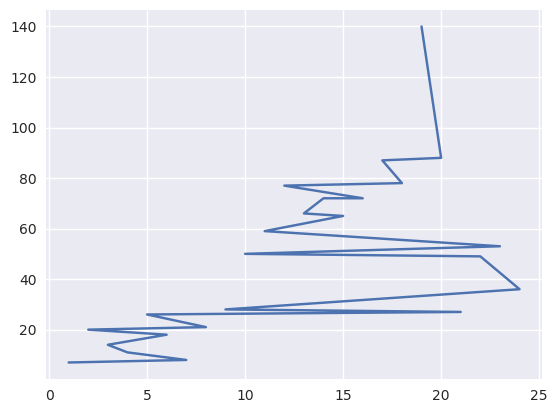

In [47]:
hits_campanias['semana'] = hits_campanias['timestamp'].dt.week - 1
hits_campanias['semana'] = pd.to_datetime('2018', format='%Y') + pd.to_timedelta(hits_campanias['semana'].mul(7).astype('str') + ' days')
conversions['semana'] = .dt.week.value_counts().plot()

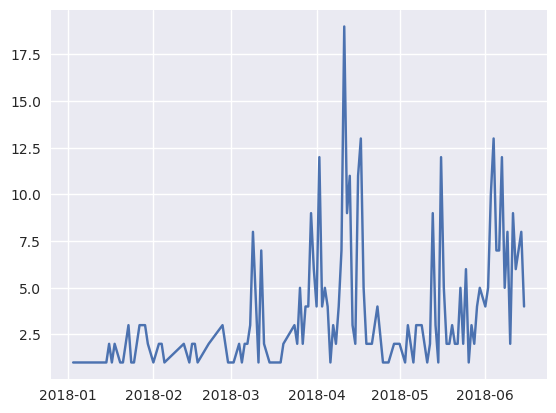

In [43]:
leads['timestamp'].dt.date.value_counts().plot()